In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load the data
train_data = pd.read_csv('train.csv',low_memory=False)
store_data = pd.read_csv('store.csv')

In [ ]:
# Combine train and store data
train_data = pd.merge(train_data, store_data, on='Store', how='left')
train_data = train_data[train_data['Sales'] != 0]

In [ ]:
# Data Cleaning

# Convert date column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [ ]:
# Feature Engineering

# Extract month and year from the date
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year

In [ ]:
# Exploratory Data Analysis

# Overview of the dataset
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,7,2015


In [ ]:
# Statistical summary
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,842152.000000,575738.000000,575738.000000,844338.000000,421046.000000,421046.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,5458.156627,7.224842,2008.697753,0.498670,23.254177,2011.753929,5.845774,2013.831945
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,7809.573181,3.210118,5.978064,0.499999,14.100647,1.660946,3.323959,0.777271
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,2013.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,3.000000,2013.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,6.000000,2014.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,8.000000,2014.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,12.000000,2015.000000


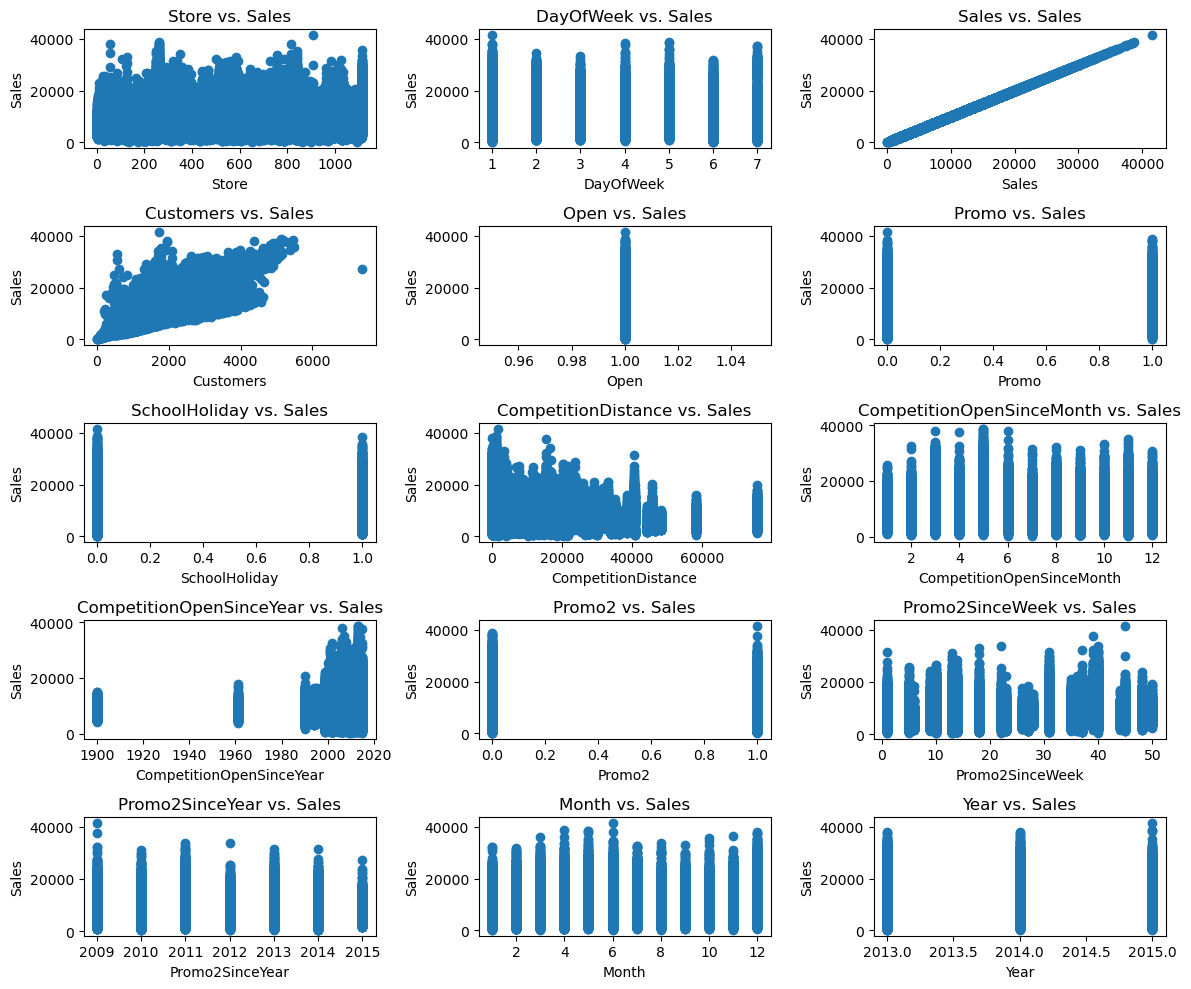

In [ ]:
# Get the numeric columns from train_data
numeric_columns = train_data.select_dtypes(include='number').columns

# Define the number of rows and columns for subplots
num_rows = 5
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate through each numeric column and plot against sales
for idx, column in enumerate(numeric_columns):
    row = idx // num_cols
    col = idx % num_cols

    # Plot the numeric column against sales
    axes[row, col].scatter(train_data[column], train_data['Sales'])
    axes[row, col].set_title(f"{column} vs. Sales")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Sales")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Calculate average sales for all available data
average_sales = train_data['Sales'].mean()

print(f"Average Sales: {average_sales:.2f}")

Average Sales: 6955.96


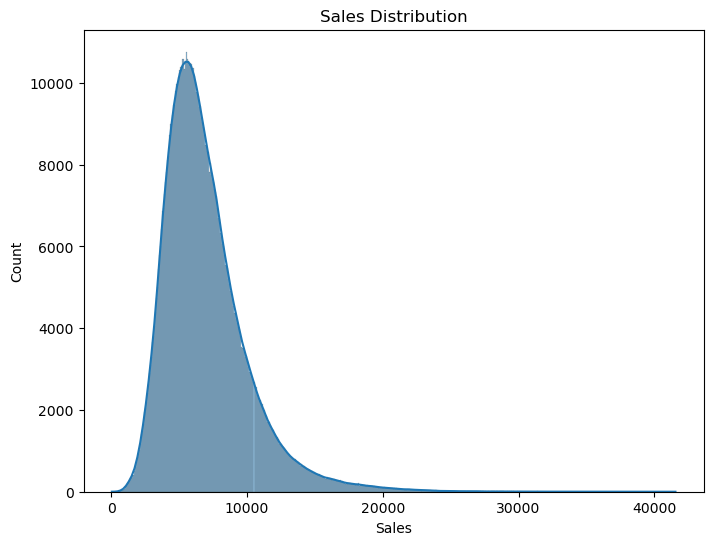

In [ ]:
# Sales distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

In [ ]:
#Average number of sales when store is running a promo on that day
train_data[train_data["Promo"]==1]["Sales"].mean()

8228.739730679934

In [ ]:
#Average number of sales when store is not running a promo on that day
train_data[train_data["Promo"]==0]["Sales"].mean()

5929.826183034807

In [ ]:
#Average number of sales when there is a public holiday
train_data[train_data["StateHoliday"]=="a"]["Sales"].mean()

8487.471181556197

In [ ]:
#Average number of sales when there is a Easter holiday
train_data[train_data["StateHoliday"]=="b"]["Sales"].mean()

9887.889655172414

In [ ]:
#Average number of sales when there is a christmas holiday
train_data[train_data["StateHoliday"]=="c"]["Sales"].mean()

9743.74647887324

In [ ]:
#Average number of sales when there is no holiday
train_data[train_data["StateHoliday"]=='0']["Sales"].mean()

6953.960228970345

In [ ]:
#Average number of sales when there is school holiday
train_data[train_data["SchoolHoliday"]==1]["Sales"].mean()

7200.710281746153

In [ ]:
#Average number of sales when there is school no holiday
train_data[train_data["SchoolHoliday"]==0]["Sales"].mean()

6897.20783001147

In [ ]:
# Find the unique holiday dates and their corresponding names
holidays = train_data[train_data['StateHoliday'].isin(['a', 'b', 'c'])][['StateHoliday', 'Date']].drop_duplicates()

# Define the holiday names
holiday_names = {
    'b': 'Easter',
    'c': 'Christmas'
}

# Calculate average sales for the 10 days before each holiday
for holiday, name in holiday_names.items():
    holiday_dates = holidays[holidays['StateHoliday'] == holiday]['Date']
    target_dates = holiday_dates - pd.DateOffset(days=10)
    average_sales = []
    for date, target_date in zip(holiday_dates, target_dates):
        filtered_sales = train_data[(train_data['Date'] >= target_date) & (train_data['Date'] < date)]
        average_sales.append(filtered_sales['Sales'].mean())
    print(f"Average Sales 10 Days Before {name}: {sum(average_sales) / len(average_sales):.2f}")

Average Sales 10 Days Before Easter: 8129.74
Average Sales 10 Days Before Christmas: 10319.50


In [ ]:
# Define the holiday dates
holidays = train_data[train_data['StateHoliday'].isin(['b', 'c'])]['Date']

# Create a new column indicating if the date is 10 days before a holiday
train_data['IsBeforeHoliday'] = (train_data['Date'].isin(holidays - pd.DateOffset(days=10))).astype(int)

# Filter the data for the days that are 10 days before a holiday
sales_before_holiday = train_data[train_data['IsBeforeHoliday'] == 1]

# Calculate the average sales
average_sales_before_holiday = sales_before_holiday['Sales'].mean()

print(f"Average Sales Before Holiday: {average_sales_before_holiday:.2f}")

Average Sales Before Holiday: 8451.67


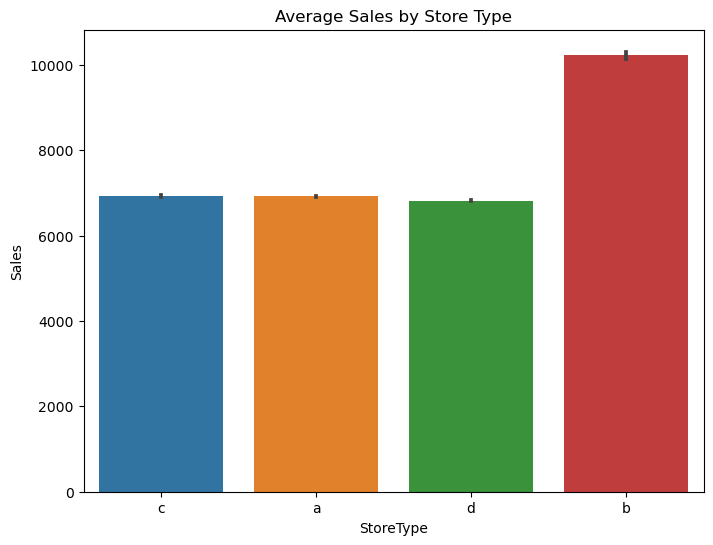

In [ ]:
# Average sales by store type
plt.figure(figsize=(8, 6))
sns.barplot(x='StoreType', y='Sales', data=train_data)
plt.title('Average Sales by Store Type')
plt.show()

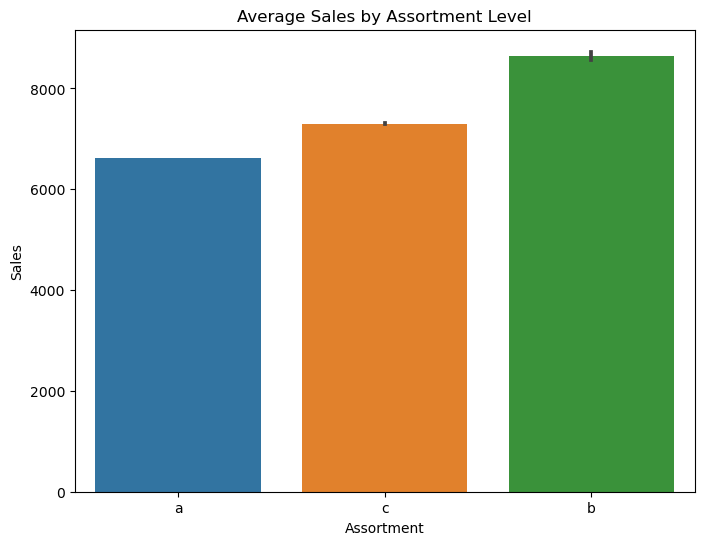

In [ ]:
# Average sales by assortment level
plt.figure(figsize=(8, 6))
sns.barplot(x='Assortment', y='Sales', data=train_data)
plt.title('Average Sales by Assortment Level')
plt.show()

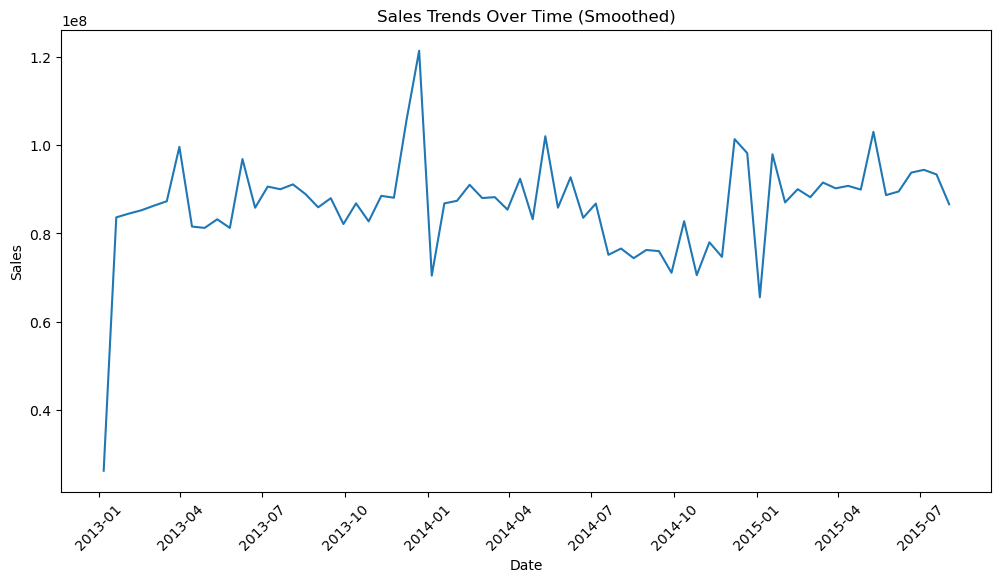

In [ ]:
# Aggregate sales data to 2-week (14-day) intervals
smoothed_sales = train_data.resample('2W', on='Date')['Sales'].sum().reset_index()

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=smoothed_sales)
plt.title('Sales Trends Over Time (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Month with the highest sales: 12
Month with the lowest sales: 9


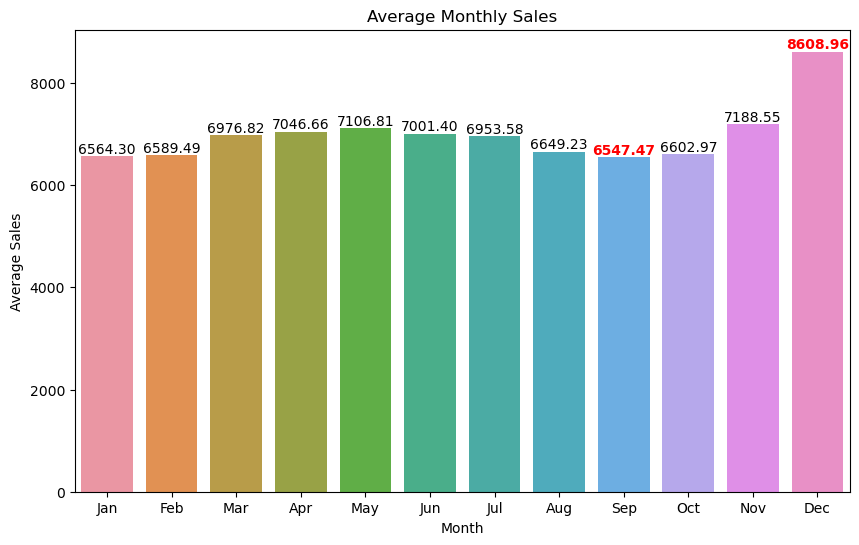

In [ ]:
# Calculate average monthly sales
monthly_sales = train_data.groupby(['Month'])['Sales'].mean().reset_index()

# Find the month with the highest and lowest sales
month_with_most_sales = monthly_sales.loc[monthly_sales['Sales'].idxmax(), 'Month']
month_with_least_sales = monthly_sales.loc[monthly_sales['Sales'].idxmin(), 'Month']

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add text labels to the bars
for i, value in enumerate(monthly_sales['Sales']):
    if i+1 == month_with_most_sales or i+1 == month_with_least_sales:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', color='red', fontweight='bold')
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Print the month with the highest and lowest sales
print(f"Month with the highest sales: {month_with_most_sales}")
print(f"Month with the lowest sales: {month_with_least_sales}")

plt.show()

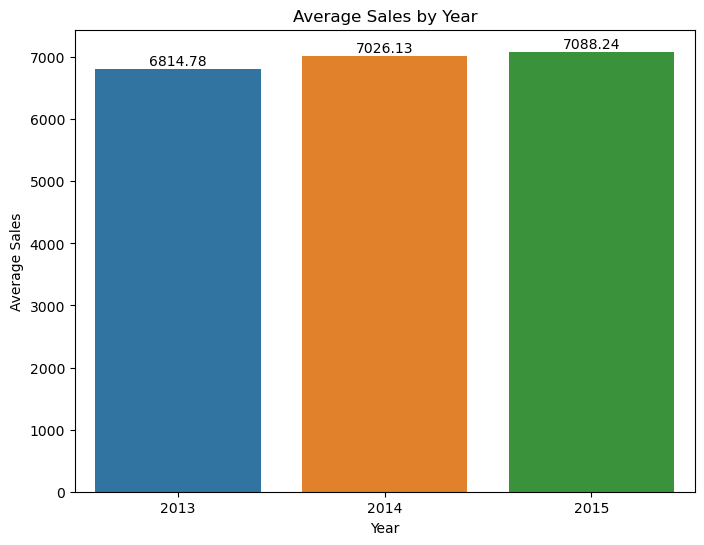

In [ ]:
# Calculate average sales by year
average_sales_by_year = train_data.groupby('Year')['Sales'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Year', y='Sales', data=average_sales_by_year)
plt.title('Average Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')

# Add value labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

Day with the minimum average sales: 5
Day with the maximum average sales: 6


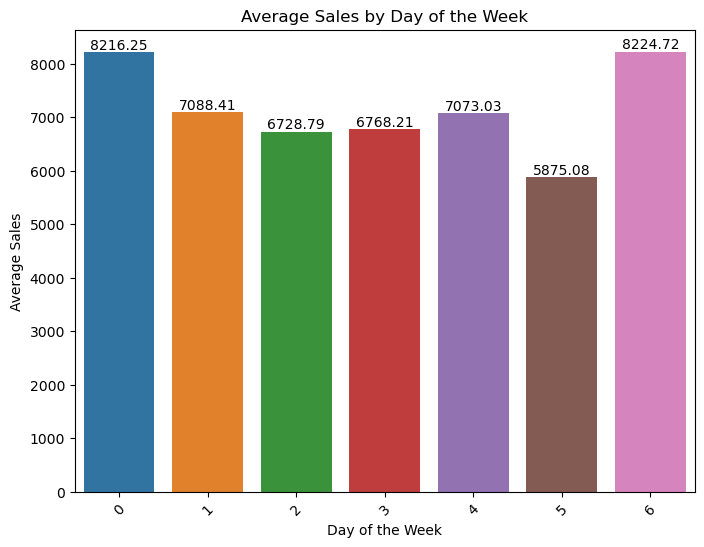

In [ ]:
# Average sales by day of the week
train_data['DayOfWeek'] = train_data['Date'].dt.dayofweek
avg_sales_by_day = train_data.groupby('DayOfWeek')['Sales'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='DayOfWeek', y='Sales', data=avg_sales_by_day)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Add value labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Print and show the day with the minimum and maximum average sales
min_sales_day = avg_sales_by_day.loc[avg_sales_by_day['Sales'].idxmin(), 'DayOfWeek']
max_sales_day = avg_sales_by_day.loc[avg_sales_by_day['Sales'].idxmax(), 'DayOfWeek']
print(f"Day with the minimum average sales: {min_sales_day}")
print(f"Day with the maximum average sales: {max_sales_day}")

plt.show()

In [ ]:
# Load the data
data = train_data.drop(columns=['Date'])

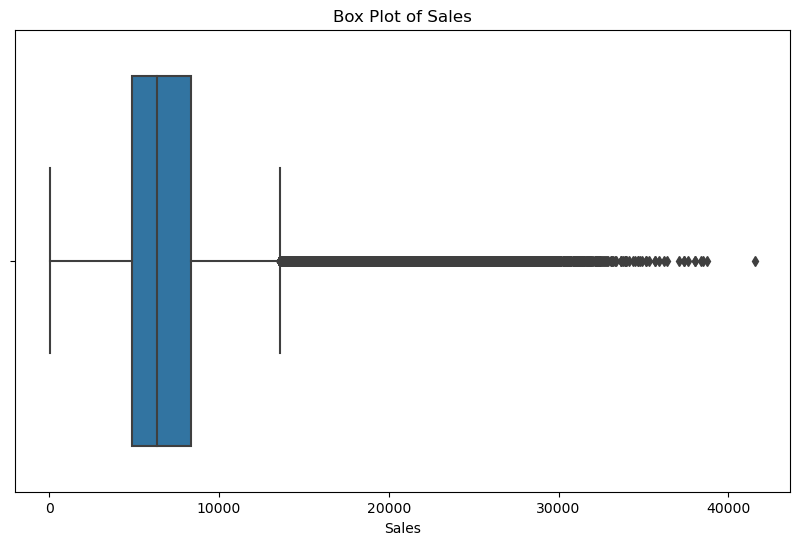

In [ ]:
# Create box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales', data=data)
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

In [ ]:
# Identify and remove outliers
q1 = data['Sales'].quantile(0.25)
q3 = data['Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

In [ ]:
# Drop NaN values
data.dropna(inplace=True)

In [ ]:
# Find categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Create dummy variables
dummy_features = pd.get_dummies(data[categorical_features], drop_first=True)

# Concatenate the original dataset with the dummy variables
data_with_dummies = pd.concat([data, dummy_features], axis=1)

# Drop the original categorical features from the dataset
data_with_dummies.drop(categorical_features, axis=1, inplace=True)

In [ ]:
# Use the modified dataset for further analysis
X = data_with_dummies.drop('Sales', axis=1)
y = data_with_dummies['Sales']

In [ ]:
# Create correlation matrix
correlation_matrix = X.corr()

# Drop features with high multicollinearity
correlation_threshold = 0.6
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
X.drop(to_drop, axis=1, inplace=True)

In [ ]:
# Plotting correlation heatmap
X = X.drop(columns=["Open","Promo2"])

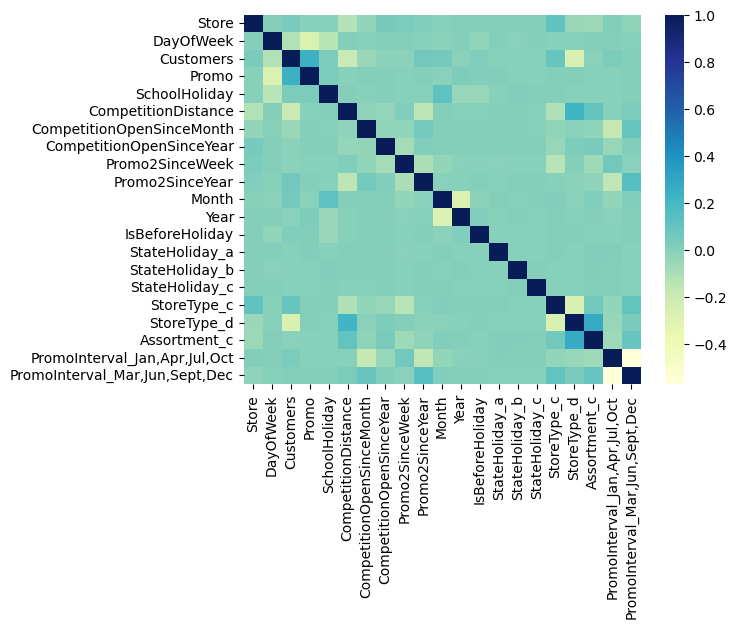

In [ ]:
dataplot = sns.heatmap(X.corr(), cmap="YlGnBu")

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Define the individual regression models
linear_reg = LinearRegression()
elastic_net = ElasticNet()
xgboost = XGBRegressor()

In [ ]:
# Define the parameter grids for grid search
param_grids = {
    'linear': {},
    'elastic_net': {'alpha': [0.1, 0.5, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]},
    'xgb': {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}
}

In [ ]:
# Perform grid search with cross-validation on the training set
best_models = {}
for model_name, model in [('linear', linear_reg), ('elastic_net', elastic_net), ('xgb', xgboost)]:
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

In [ ]:
# Build VotingRegressor with the best models and their parameters
estimators = [
    ('linear', best_models['linear']),
    ('elastic_net', best_models['elastic_net']),
    ('xgb', best_models['xgb'])
]
voting_regressor = VotingRegressor(estimators)

# Fit the VotingRegressor on the training set
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('elastic_net',
                             ElasticNet(alpha=0.1, l1_ratio=0.8)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=300, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))])

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the R-squared scores for the models
r2_scores = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    r2_scores[model_name] = r2

# Print the R-squared scores
for model_name, r2 in r2_scores.items():
    print(f'{model_name}: R-squared = {r2:.2f}')

linear: R-squared = 0.80
elastic_net: R-squared = 0.80
xgb: R-squared = 0.97


In [ ]:
# Evaluate the models on the validation set
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    mpe_values = np.abs(y_val - y_pred) / np.maximum(np.abs(y_val), 1)
    mpe_values = mpe_values[~np.isinf(mpe_values)]
    mpe = np.mean(mpe_values) * 100
    results[model_name] = {'MSE': mse, 'MAE': mae, 'Mean Percentage Error': mpe}


In [ ]:
# Add the VotingRegressor to the results
y_pred_voting = voting_regressor.predict(X_val)
mse_voting = mean_squared_error(y_val, y_pred_voting)
mae_voting = mean_absolute_error(y_val, y_pred_voting)
mpe_voting = np.mean(np.abs(y_val - y_pred_voting) / y_val) * 100
results['voting'] = {'MSE': mse_voting, 'MAE': mae_voting, 'Mean Percentage Error': mpe_voting}

In [ ]:
# Print the evaluation results on the validation set
print("Validation Set Results:")
for model_name, result in results.items():
    print(f'{model_name}:')
    print(f'Mean Squared Error (MSE): {result["MSE"]:.2f}')
    print(f'Mean Absolute Error (MAE): {result["MAE"]:.2f}')
    print(f'Mean Percentage Error (MPE): {result["Mean Percentage Error"]:.2f}%')
    print()

Validation Set Results:
linear:
Mean Squared Error (MSE): 1086425.11
Mean Absolute Error (MAE): 804.07
Mean Percentage Error (MPE): 13.29%

elastic_net:
Mean Squared Error (MSE): 1089899.40
Mean Absolute Error (MAE): 804.50
Mean Percentage Error (MPE): 13.28%

xgb:
Mean Squared Error (MSE): 154019.93
Mean Absolute Error (MAE): 288.34
Mean Percentage Error (MPE): 4.72%

voting:
Mean Squared Error (MSE): 568977.38
Mean Absolute Error (MAE): 576.85
Mean Percentage Error (MPE): 9.51%



In [ ]:
#Choosing the best model as XGBoost

In [ ]:
# Retrain the models on the combined training and validation sets
X_train_combined = np.concatenate([X_train, X_val], axis=0)
y_train_combined = np.concatenate([y_train, y_val], axis=0)

In [ ]:
# Fit the VotingRegressor on the combined training and validation sets
xgboost =  best_models['xgb']
xgboost.fit(X_train_combined, y_train_combined)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Evaluate the models on the test set
y_pred = xgboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mpe = np.mean(np.abs(y_test - y_pred) / y_test) * 100

In [ ]:
# Print the evaluation results on the test set
print("Test Set Results:")
print(f'Voting Regressor:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Percentage Error (MPE): {mpe:.2f}%')

Test Set Results:
Voting Regressor:
Mean Squared Error (MSE): 154076.97
Mean Absolute Error (MAE): 287.13
Mean Percentage Error (MPE): 4.72%


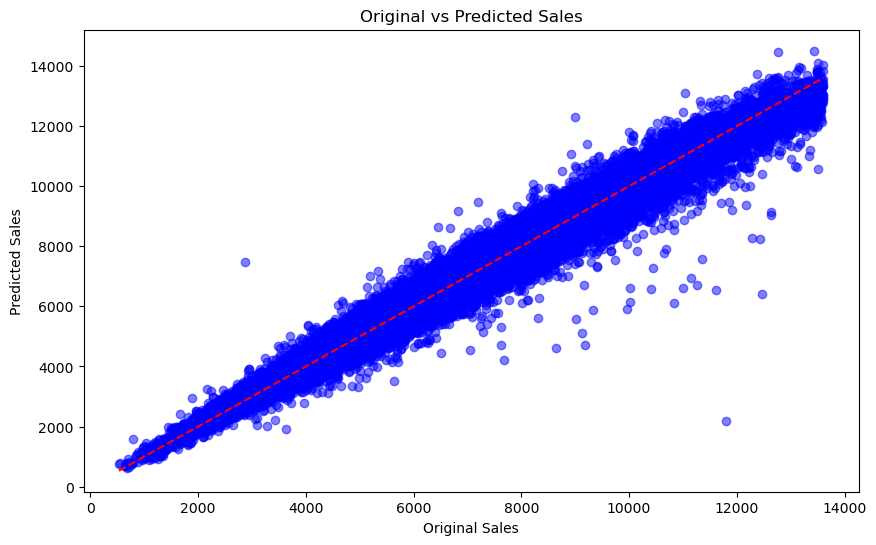

In [ ]:
# Create a scatter plot to compare the original and predicted sales values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Original vs Predicted Sales')
plt.xlabel('Original Sales')
plt.ylabel('Predicted Sales')
plt.show()